In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from os.path  import join
import struct
from array import array

In [139]:
INPUT_PATH = './data'

training_images_filepath = join(INPUT_PATH, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(INPUT_PATH, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(INPUT_PATH, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(INPUT_PATH, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [140]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return np.array(images), np.array(labels)
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  
    

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


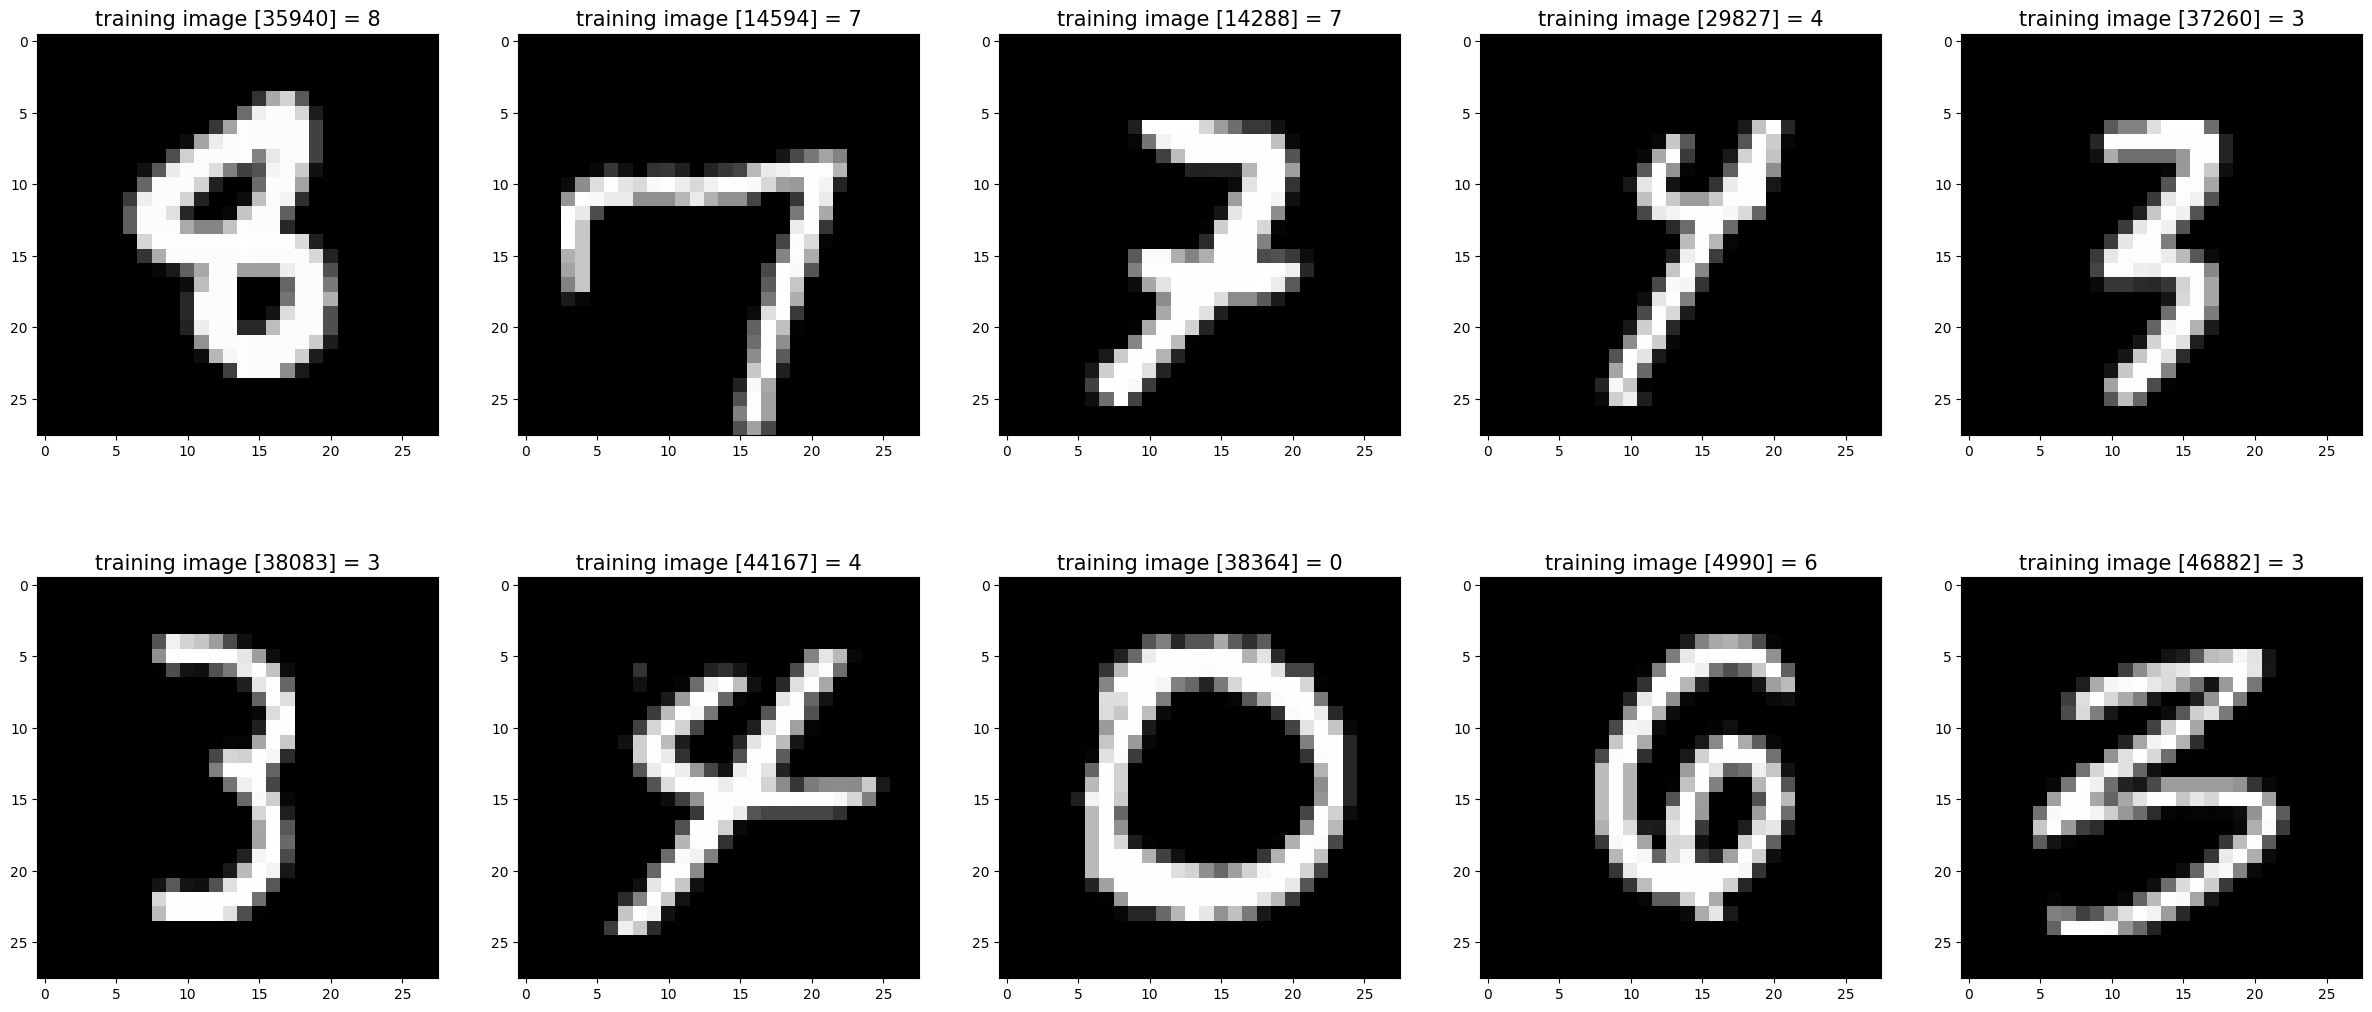

In [141]:
import random

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1

    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if(title_text != ''):
            plt.title(title_text, fontsize=15)
        index += 1

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
  
    images_2_show.append(x_train[r])

    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    


show_images(images_2_show, titles_2_show)

In [142]:
print(f"Kích thước tập Train: {x_train.shape}")
print(f"Kích thước tập Label: {y_train.shape}")
print(f"Kiểu dữ liệu (Dtype): {x_train.dtype}")


Kích thước tập Train: (60000, 28, 28)
Kích thước tập Label: (60000,)
Kiểu dữ liệu (Dtype): uint8


Giá trị Pixel Tối thiểu: 0
Giá trị Pixel Tối đa: 255
Giá trị Pixel Trung bình: 33.32


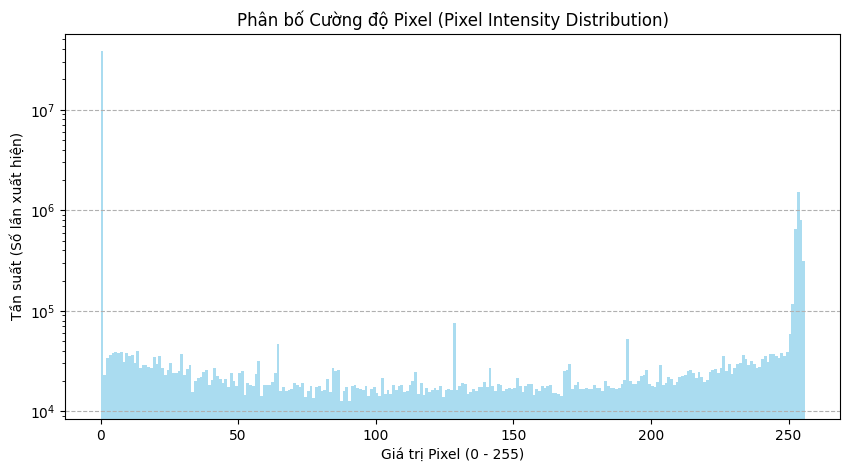

In [143]:
min_pixel = np.min(x_train)
max_pixel = np.max(x_train)
mean_pixel = np.mean(x_train)

print(f"Giá trị Pixel Tối thiểu: {min_pixel}") # Mong đợi: 0
print(f"Giá trị Pixel Tối đa: {max_pixel}")   # Mong đợi: 255
print(f"Giá trị Pixel Trung bình: {mean_pixel:.2f}") # Thường khoảng 30-35

all_pixels = x_train.flatten()

plt.figure(figsize=(10, 5))
plt.hist(all_pixels, bins=256, range=(0, 256), color='skyblue', alpha=0.7)

plt.title('Phân bố Cường độ Pixel (Pixel Intensity Distribution)')
plt.xlabel('Giá trị Pixel (0 - 255)')
plt.ylabel('Tần suất (Số lần xuất hiện)')
plt.yscale('log')
plt.grid(axis='y', linestyle='--')
plt.show()


[5 0 4 ... 5 6 8]


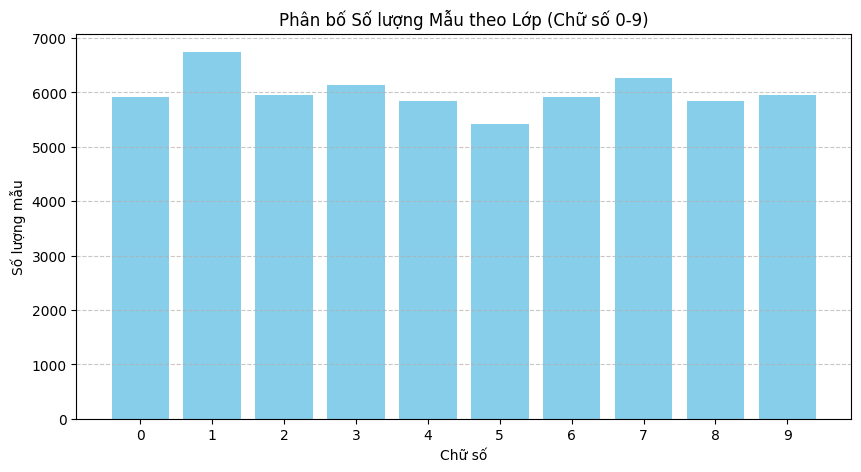

In [144]:

print(y_train)
unique_digits, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(unique_digits, counts, color='skyblue')
plt.xticks(unique_digits)
plt.title('Phân bố Số lượng Mẫu theo Lớp (Chữ số 0-9)')
plt.xlabel('Chữ số')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Thêm lưới cho dễ đọc

plt.show()

In [145]:
# Loại bỏ các Pixels có Cường độ không đổi
x_train_flat = x_train.reshape(x_train.shape[0], -1)

variances = np.var(x_train_flat, axis=0)

constant_pixel_indices = np.where(variances == 0)[0]

x_train_reduced = np.delete(x_train_flat, constant_pixel_indices, axis=1)

print(f"constant_pixel_indice: {constant_pixel_indices}")
print(f"Số lượng features giảm từ 784 xuống còn {x_train_reduced.shape[1]}")

constant_pixel_indice: [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 140 141 168 476 560 644 645 671 672 673 699 700 701 727
 728 729 730 754 755 756 757 758 759 780 781 782 783]
Số lượng features giảm từ 784 xuống còn 717


In [146]:
# Pictures intensity rescaling
x_train_normalized = x_train_reduced.astype('float32') / 255.0


In [148]:
import numpy as np

print("--- TRƯỚC KHI CHUẨN HÓA ---")
print(f"Min: {np.min(x_train)}")
print(f"Max: {np.max(x_train)}")
print(f"Kiểu dữ liệu: {x_train.dtype}")
print("-" * 30)

print("--- SAU KHI CHUẨN HÓA ---")
print(f"Min: {np.min(x_train_normalized)}")
print(f"Max: {np.max(x_train_normalized)}")
print(f"Kiểu dữ liệu: {x_train_normalized.dtype}")

--- TRƯỚC KHI CHUẨN HÓA ---
Min: 0
Max: 255
Kiểu dữ liệu: uint8
------------------------------
--- SAU KHI CHUẨN HÓA ---
Min: 0.0
Max: 1.0
Kiểu dữ liệu: float32


In [162]:
# One-hot encoding
num_classes = 10 
y_train_encoded = np.eye(num_classes)[y_train]
y_test_encoded = np.eye(num_classes)[y_test]

In [ ]:
# Xử lý tập test
x_test_flat = x_test.reshape(x_test.shape[0], -1)

variances_test = np.var(x_test_flat, axis=0)

x_test_reduced = np.delete(x_test_flat, constant_pixel_indices, axis=1)

x_test_normalized = x_test_reduced.astype('float32') / 255.0

In [164]:
# Thêm bias - dữ liệu đầu ra cuối
x_train_bias = np.hstack((np.ones((x_train_normalized.shape[0], 1)), x_train_normalized))
x_test_bias = np.hstack((np.ones((x_test_normalized.shape[0], 1)), x_test_normalized))

In [171]:
print(x_train_bias.shape)
print(y_train_encoded.shape)
print(x_test_bias.shape)
print(y_test_encoded.shape)

(60000, 718)
(60000, 10)
(10000, 669)
(10000, 10)
